## Mini Project III

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import RobustScaler

# from sklearn.cluster import KMeans
# from sklearn.cluster import AgglomerativeClustering
# import scipy.cluster.hierarchy as sch
# from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA

# from scipy.optimize import minimize_scalar
# from scipy.optimize import minimize, LinearConstraint

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_regression, SelectKBest


from datetime import datetime


In [4]:
# import plotly.express as px
import plotly.graph_objects as go
import plotly 

# For interactive widgets:

from ipywidgets.widgets import interact, interact_manual
import ipywidgets as widgets

In [5]:
dfaccounts = pd.read_csv('twm_accounts.csv',sep=';')
print(dfaccounts['acct_type'].value_counts())
dfaccounts.head(3)

CK      520
CC      468
SV      421
Name: acct_type, dtype: int64


,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00


In [135]:
dfchecking_acct = pd.read_csv('twm_checking_acct.csv',sep=';')
dfchecking_acct.head(3)

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.0,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.0,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.0,Y,19.3.1994,NaN,2694.91,147.15


In [136]:
dfcredit_acct = pd.read_csv('twm_credit_acct.csv',sep=';')
dfcredit_acct.head(3)

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68


In [6]:
dfchecking_tran = pd.read_csv('twm_checking_tran.csv',sep=',')
dfchecking_tran.head(3)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1362480,1,-297.38,-297.38,0.0,34.47,2.1.1995,,P,WD
1,1362484,1,-172.76,-172.76,0.0,2440.70,2.1.1995,,P,WD
2,1362485,1,-26.79,-26.79,0.0,182.99,26.9.1995,,P,WD


In [153]:
dfcustomer = pd.read_csv('twm_customer.csv',sep=';')
dfcustomer.head(3)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA


In [214]:
def explore(df,id=0,printValues=False):
    """
    Explore dataframe data.
    Parameters:
    df: Dataframe.
    id: Column number or name with the primary IDs. Default is zero.
    """
    if (id==False) & (id !=0):
        pass
    elif isinstance(id,int):
    # if type(id)==int:
        print(f'Unique IDs: {len(set(df.iloc[:,0]))}. # of rows: {df.shape[0]}. Match: {len(set(df.iloc[:,0]))==df.shape[0]}')
    else:
        print(f'Unique IDs: {len(set(df[id]))}. # of rows: {df.shape[0]}. Match: {len(set(df[id]))==df.shape[0]}')
    
    if len(set(df.iloc[:,0])) !=df.shape[0]:
        for column in df.columns:
            print(column, len(df[column].value_counts()))
    
    # count amount of missing values in each column
    total = df.isnull().sum().sort_values(ascending=False) 
    # % of rows with missing data from each column
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) 

    # create a table that lists total and % of missing values starting with the highest
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 

    if (printValues == True):
        # extract the names of columns with missing values
        cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
        print(df.dtypes[cols_with_missing])

    print(f'')
    return missing_data

explore(dfcustomer,printValues=True,id=0)

Unique IDs: 747. # of rows: 747. Match: True
Series([], dtype: object)



,Total,Percent
cust_id,0,0.0
income,0,0.0
age,0,0.0
years_with_bank,0,0.0
nbr_children,0,0.0
gender,0,0.0
marital_status,0,0.0
name_prefix,0,0.0
first_name,0,0.0
last_name,0,0.0


In [98]:
id='abc'
if id==False:
    print('x')

In [583]:
dfsavings_tran = pd.read_csv('twm_savings_tran.csv',sep=';')
dfsavings_tran.head(3)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN


In [141]:
# Unable to find unique ID column for dfsavings_tran data
explore(dfsavings_tran,'tran_id')
dfsavings_tran.describe()

Unique IDs: 62. # of rows: 11189. Match: False
cust_id 420
tran_id 62
tran_amt 4648
principal_amt 3971
interest_amt 686
new_balance 10012
tran_date 365
tran_time 5832
channel 9
tran_code 6
Series([], dtype: object)



,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance
count,1.118900e+04,11189.000000,11189.000000,11189.000000,11189.000000,11189.000000
mean,1.362988e+06,16.113504,14.458362,13.628621,0.829741,1229.467968
std,2.979129e+02,11.024730,221.971173,222.003741,2.856393,2256.670395
min,1.362480e+06,1.000000,-2495.880000,-2495.880000,0.000000,0.070000
25%,1.362720e+06,7.000000,-0.750000,-0.750000,0.000000,238.480000
50%,1.362978e+06,14.000000,0.390000,0.000000,0.000000,562.040000
75%,1.363262e+06,23.000000,7.340000,0.000000,0.480000,1247.300000
max,1.363495e+06,62.000000,4478.610000,4478.610000,44.680000,26016.690000


In [142]:
px.histogram(dfsavings_tran,x='tran_amt')

In [143]:
dftransactions = pd.read_csv('twm_transactions.csv',sep=';')
dftransactions.head(3)

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD


<AxesSubplot: xlabel='tran_date', ylabel='tran_amt'>

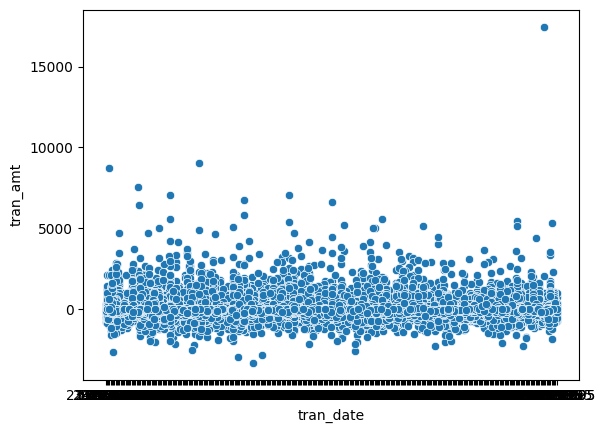

In [144]:
sns.scatterplot(data=dftransactions,x='tran_date',y='tran_amt')

In [590]:
# Convert tran_date to dates

# date = datetime.strptime(dftransactions['tran_date'][0],'%d.%m.%Y')
# date.strftime('%Y')

def date_columns(df,date_column='tran_date',format='%d.%m.%Y'):
    """
    Take the dates in a dateframes to create new columns:
        _date_standard: Datetime data 
        _year
        _month
    Parmaters:
    - df: Dataframe.
    - date_column: Name of the column containing the date strings.
    - Format: Original date format in the dateframe. Default: '%d.%m.%Y'
    
    Make sure to do the following import: 
    from datetime import datetime
    """
    date_column=str(date_column)
    
    # df[str(date_column+'_year')] = pd.to_datetime(df[date_column],
    #     format='%d.%m.%Y')
    date = pd.to_datetime(df[date_column],
        format='%d.%m.%Y')
    df[str(date_column+'_standard')] = date
    df[str(date_column+'_year')] = date.dt.year
    df[str(date_column+'_month')] = date.dt.month
    return df

# date_columns(dftransactions)
# dftransactions.head()


In [146]:
pd.to_datetime(dftransactions['tran_date'],format='%d.%m.%Y')

0       1995-10-21
1       1995-02-05
2       1995-07-23
3       1995-01-30
4       1995-01-25
           ...    
77575   1995-02-14
77576   1995-03-11
77577   1995-08-26
77578   1995-06-13
77579   1995-10-18
Name: tran_date, Length: 77580, dtype: datetime64[ns]

In [147]:
explore(dftransactions)

Unique IDs: 155. # of rows: 77580. Match: False
tran_id 155
acct_nbr 1398
tran_amt 33465
principal_amt 32715
interest_amt 1907
new_balance 55730
tran_date 365
tran_time 33276
channel 11
tran_code 13
tran_date_standard 365
tran_date_year 1
tran_date_month 12
Series([], dtype: object)



,Total,Percent
tran_id,0,0.0
acct_nbr,0,0.0
tran_amt,0,0.0
principal_amt,0,0.0
interest_amt,0,0.0
new_balance,0,0.0
tran_date,0,0.0
tran_time,0,0.0
channel,0,0.0
tran_code,0,0.0


In [582]:
dfcredit_tran = pd.read_csv('twm_credit_tran.csv',sep=',')
explore(dfcredit_tran)
dfcredit_tran.head(3)

Unique IDs: 457. # of rows: 20167. Match: False
cust_id 457
tran_id 155
tran_amt 14042
principal_amt 14130
interest_amt 1695
new_balance 15493
tran_date 365
tran_time 14871
channel 9
tran_code 5



,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1362480,1,163.00,140.36,22.64,-1467.04,3.1.1995,170031,C,PM
1,1362484,1,1293.59,1278.78,14.81,0.00,5.1.1995,195414,C,PM
2,1362485,1,191.24,187.26,3.98,-95.12,3.1.1995,,M,PM


In [150]:
# print shape of transaction dataframes
dflist = [
    dftransactions,
    dfsavings_tran,
    dfchecking_tran,
    dfcredit_tran]
# dflist = [dftransactions,dfsavings_tran,dfchecking_tran,dfcredit_tran,dfcustomer]
rows = []
for df in dflist:
    rows.append(len(df))
    print(df.shape)

# See if dftransactions is the sum of all transactions in other dfs
print(sum(rows[1:]), rows[0]==sum(rows[1:]),': Difference is ',rows[0]-sum(rows[1:]))


(77580, 13)
(11189, 10)
(46204, 10)
(20167, 10)
77560 False : Difference is  20


In [152]:
# print shape of customer and account dataframes
dflist = [
   dfaccounts,
   dfcustomer
   ]
# dflist = [dftransactions,dfsavings_tran,dfchecking_tran,dfcredit_tran,dfcustomer]
rows = []
for df in dflist:
    rows.append(len(df))
    print(df.shape)


(1409, 8)
(747, 15)


In [153]:
df=dfcustomer
@interact_manual #decorator
def exploreScatterplot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:]):

    # trace
    trace = [go.Scatter(x=df[x], y=df[y], mode='markers')]

    # layout
    layout = go.Layout(
                title = 'Scatter plot', # Graph title
                xaxis = dict(title = x.title()), # x-axis label
                yaxis = dict(title = y.title()), # y-axis label
                hovermode ='closest' # handles multiple points landing on the same vertical
    )

    # fig
    fig = go.Figure(trace, layout)
    fig.show()

interactive(children=(Dropdown(description='x', options=('cust_id', 'income', 'age', 'years_with_bank', 'nbr_c…

In [154]:
df=dfsavings_tran[dfsavings_tran['tran_amt'] != 0] # Put name of dataframe variable here
@interact_manual #decorator
def exploreHistogram(x=list(df.select_dtypes('number').columns)[1:]):
    fig = px.histogram(x=df[x],title=x)
    fig.show()

interactive(children=(Dropdown(description='x', options=('tran_id', 'tran_amt', 'principal_amt', 'interest_amt…

In [155]:
""" Notes from looking at transaction data:
- Think of how to filter out transactions with zero amount.
"""
print('Start of transactions record: ',dftransactions['tran_date_standard'].min())
print('End of transactions record: ',dftransactions['tran_date_standard'].max())

Start of transactions record:  1995-01-01 00:00:00
End of transactions record:  1995-12-31 00:00:00


In [156]:
df=dfcredit_tran # Put name of dataframe variable here
@interact_manual #decorator
def exploreHistogram(x=list(df.select_dtypes('number').columns)[2:]):
    fig = px.histogram(x=df[x],title=x)
    fig.show()

interactive(children=(Dropdown(description='x', options=('tran_amt', 'principal_amt', 'interest_amt', 'new_bal…

In [157]:
df=dfchecking_tran # Put name of dataframe variable here
@interact_manual #decorator
def exploreHistogram(x=list(df.select_dtypes('number').columns)[2:]):
    fig = px.histogram(x=df[x],title=x)
    fig.show()

interactive(children=(Dropdown(description='x', options=('tran_amt', 'principal_amt', 'interest_amt', 'new_bal…

In [159]:
# For credit transactions, positive amount means borrowing/spending because there is 
# interest, whereas negative transaction amounts don't have interest.

df=dfsavings_tran
cust_id = 'cust_id'
accountType = 'saving'
column='tran_amt'
filterZeros = df[df[column] == 0].index
filterZeros

Int64Index([   14,    15,    26,    31,    33,    57,    92,    93,    94,
              139,
            ...
            11098, 11100, 11103, 11117, 11131, 11147, 11165, 11167, 11175,
            11181],
           dtype='int64', length=929)

In [215]:
def transactionsFeatures(df,accountType,column='tran_amt',cust_id='cust_id'):
    """
    1. filter out transactions that are $0.00
    2. create new columns for 1) spending amounts and 2) saving amounts
    3. aggregate each transaction table by customer
    4. calculate features of interest
    5. rename transactions column to indicate account type

    Parameter:
    - df: Dataframe.
    - accountType: (string) Type of account.
    - column: Name of column with transaction amount.
    - cust_id: Name of column with customer ID.

    By default, transaction amounts < 0 indicates spending (default). 
    If false (i.e. for credit accounts), transaction amounts > 0 indicate spending.

    Returns a dataframe where each column contains aggregate data for the account type (savings, checking, credit).
    For each account type, the data has also been classified 
    as either spending (e.g. negative trans_amt for savings/checking accounts, 
    or positive trans_amt), as indicated in the column name ('total' is the combo
    of all transactions for that account type).
    
    """
    accountType = str(accountType)
    # filterZeros = df[df[column] == 0].index
    df.drop(df[df[column]==0].index, inplace=True) # filter out transactions that are $0.00
    if accountType.lower() != 'credit':
        filterSpend = df[column] < 0
        filterSave = df[column] > 0
    else:
        filterSpend = df[column] > 0
        filterSave = df[column] < 0
    # df.loc[filterSpend,accountType+'_spending']=0
    df.loc[filterSpend,accountType+'_spending']=abs(df.loc[filterSpend,column])
    df.loc[filterSave,accountType+'_saving']=abs(df.loc[filterSave,column])

    return df.groupby(cust_id).agg(
        spend_mean_amount=(accountType+'_spending','mean'),
        spend_sum=(accountType+'_spending','sum'),
        spend_ntransactions=(accountType+'_spending','count'),
        save_mean_amount=(accountType+'_saving','mean'),
        save_sum=(accountType+'_saving','sum'),
        save_ntransactions=(accountType+'_saving','count'),
        transaction_mean_amount=(column,'mean'),
        transaction_sum=(column,'sum'),
        overall_ntransactions=(column,'count')
        ).rename(columns={
            'spend_mean_amount': accountType+'acc_spending_mean_'+column,
            'spend_sum' : accountType+'acc_spending_total_'+column,
            'spend_ntransactions' : accountType+'acc_spending_transactions_count',
            'save_mean_amount': accountType+'acc_saving_mean_'+column,
            'save_sum' : accountType+'acc_saving_total_'+column,
            'save_ntransactions' : accountType+'acc_saving_transactions_count',
            'transaction_mean_amount': accountType+'acc_'+column+'_mean',
            'transaction_sum' : accountType+'acc_'+column+'_total',
            'overall_ntransactions' : accountType+'acc_transactions_count'
        })

# Apply the above function to the checking transactions table.
customerCheckingTransactions = transactionsFeatures(dfchecking_tran,'checking',column='tran_amt',cust_id='cust_id')
customerCheckingTransactions.head(3)

,checkingacc_spending_mean_tran_amt,checkingacc_spending_total_tran_amt,checkingacc_spending_transactions_count,checkingacc_saving_mean_tran_amt,checkingacc_saving_total_tran_amt,checkingacc_saving_transactions_count,checkingacc_tran_amt_mean,checkingacc_tran_amt_total,checkingacc_transactions_count
cust_id,,,,,,,,,
1362480,102.566957,7077.12,69,488.009286,6832.13,14,-2.951687,-244.99,83
1362484,71.081667,5117.88,72,162.483750,2599.74,16,-28.615227,-2518.14,88
1362485,77.378060,5184.33,67,313.752500,5020.04,16,-1.979398,-164.29,83


In [216]:
# Apply the above function to the savings and credit transactions tables.
customerSavingTransactions = transactionsFeatures(dfsavings_tran,'saving',column='tran_amt',cust_id='cust_id')

customerCreditTransactions = transactionsFeatures(dfcredit_tran,'credit',column='tran_amt',cust_id='cust_id')
customerSavingTransactions.head()

,savingacc_spending_mean_tran_amt,savingacc_spending_total_tran_amt,savingacc_spending_transactions_count,savingacc_saving_mean_tran_amt,savingacc_saving_total_tran_amt,savingacc_saving_transactions_count,savingacc_tran_amt_mean,savingacc_tran_amt_total,savingacc_transactions_count
cust_id,,,,,,,,,
1362480,358.210000,1432.84,4,106.397778,1915.16,18,21.923636,482.32,22
1362484,257.342500,1029.37,4,102.035517,2959.03,29,58.474545,1929.66,33
1362486,85.782222,772.04,9,37.737500,603.80,16,-6.729600,-168.24,25
1362487,109.025714,763.18,7,15.542500,124.34,8,-42.589333,-638.84,15
1362489,315.612500,1262.45,4,58.390667,875.86,15,-20.346842,-386.59,19


In [217]:
# Merge the tables containing aggregate transaction data
customerTransactions = customerSavingTransactions.merge(
    customerCheckingTransactions,
    how='outer',on='cust_id').merge(
        customerCreditTransactions,
        how='outer',on='cust_id'
    )
customerTransactions

,savingacc_spending_mean_tran_amt,savingacc_spending_total_tran_amt,savingacc_spending_transactions_count,savingacc_saving_mean_tran_amt,savingacc_saving_total_tran_amt,savingacc_saving_transactions_count,savingacc_tran_amt_mean,savingacc_tran_amt_total,savingacc_transactions_count,checkingacc_spending_mean_tran_amt,...,checkingacc_transactions_count,creditacc_spending_mean_tran_amt,creditacc_spending_total_tran_amt,creditacc_spending_transactions_count,creditacc_saving_mean_tran_amt,creditacc_saving_total_tran_amt,creditacc_saving_transactions_count,creditacc_tran_amt_mean,creditacc_tran_amt_total,creditacc_transactions_count
cust_id,,,,,,,,,,,,,,,,,,,,,
1362480,358.210000,1432.84,4.0,106.397778,1915.16,18.0,21.923636,482.32,22.0,102.566957,...,83.0,433.426667,5201.12,12.0,191.321176,3252.46,17.0,67.195172,1948.66,29.0
1362484,257.342500,1029.37,4.0,102.035517,2959.03,29.0,58.474545,1929.66,33.0,71.081667,...,88.0,456.883333,5482.60,12.0,116.890513,4558.73,39.0,18.115098,923.87,51.0
1362486,85.782222,772.04,9.0,37.737500,603.80,16.0,-6.729600,-168.24,25.0,112.306667,...,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1362487,109.025714,763.18,7.0,15.542500,124.34,8.0,-42.589333,-638.84,15.0,72.242500,...,46.0,404.702500,1618.81,4.0,121.323077,3154.40,26.0,-51.186333,-1535.59,30.0
1362489,315.612500,1262.45,4.0,58.390667,875.86,15.0,-20.346842,-386.59,19.0,100.867612,...,86.0,866.210000,7795.89,9.0,244.068400,6101.71,25.0,49.828824,1694.18,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1554.873333,4664.62,3.0,150.374000,9022.44,60.0,-69.171746,-4357.82,63.0
1363332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,336.167500,4034.01,12.0,215.205556,1936.85,9.0,99.864762,2097.16,21.0
1363383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,156.432857,1095.03,7.0,NaN,0.00,0.0,156.432857,1095.03,7.0


In [223]:
# Plot transaction data grouped by customer

df=customerTransactions # Put name of dataframe variable here
@interact_manual #decorator
def exploreHistogram(x=list(df.select_dtypes('number').columns)):
    fig = px.histogram(x=df[x],title=x)
    fig.show()

interactive(children=(Dropdown(description='x', options=('savingacc_spending_mean_tran_amt', 'savingacc_spendi…

In [219]:
"""
The 'customer_transactions_scaled' CSV file contains the aggregate transaction data 
grouped by customer.
Each column contains aggregate data for the indicated account type 
(savings, checking, credit).
For each account type, the data has also been classified as either 
spending (e.g. negative trans_amt for savings/checking accounts, 
or positive trans_amt), as indicated in the column name ('total' is the combo
of all transactions for that account type).

Merge the table containing each customer's aggregate transaction data with 
the table containing customer account data using the following code:
"""
# df_accounts = df ## place accounts dataframe variable name here
# customerTransactions = pd.read_csv('customer_transactions_scaled_2022-10-11.csv') 
# customer_data = df_accounts.merge(
#     df_transactions,
#     how='outer',on='cust_id')
    
# customer_data.head()

"\nThe 'customer_transactions_summary' CSV file contains the aggregate transaction data \ngrouped by customer.\nEach column contains aggregate data for the indicated account type \n(savings, checking, credit).\nFor each account type, the data has also been classified as either \nspending (e.g. negative trans_amt for savings/checking accounts, \nor positive trans_amt), as indicated in the column name ('total' is the combo\nof all transactions for that account type).\n\nMerge the table containing each customer's aggregate transaction data with \nthe table containing customer account data using the following code:\n"

In [220]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaledCustomerTransactions = pd.DataFrame(scaler.fit_transform(customerTransactions).astype(float))
scaledCustomerTransactions.columns = customerTransactions.columns
scaledCustomerTransactions.head()

,savingacc_spending_mean_tran_amt,savingacc_spending_total_tran_amt,savingacc_spending_transactions_count,savingacc_saving_mean_tran_amt,savingacc_saving_total_tran_amt,savingacc_saving_transactions_count,savingacc_tran_amt_mean,savingacc_tran_amt_total,savingacc_transactions_count,checkingacc_spending_mean_tran_amt,...,checkingacc_transactions_count,creditacc_spending_mean_tran_amt,creditacc_spending_total_tran_amt,creditacc_spending_transactions_count,creditacc_saving_mean_tran_amt,creditacc_saving_total_tran_amt,creditacc_saving_transactions_count,creditacc_tran_amt_mean,creditacc_tran_amt_total,creditacc_transactions_count
0,0.388284,0.201381,0.121212,0.159428,0.105215,0.517241,0.385946,0.214125,0.372549,0.162223,...,0.901099,0.047051,0.145395,1.000000,0.286705,0.093318,0.125000,0.049656,0.574154,0.190476
1,0.278719,0.144675,0.121212,0.152882,0.162589,0.896552,0.498350,0.321454,0.588235,0.112058,...,0.956044,0.049744,0.153264,1.000000,0.169015,0.130796,0.286765,0.044275,0.522760,0.340136
2,0.092365,0.108508,0.272727,0.056401,0.033139,0.448276,0.297830,0.165883,0.431373,0.177741,...,0.230769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.117612,0.107262,0.212121,0.023097,0.006786,0.172414,0.187552,0.130985,0.235294,0.113908,...,0.494505,0.043754,0.045253,0.333333,0.176024,0.090504,0.191176,0.036677,0.399418,0.197279
4,0.342013,0.177433,0.121212,0.087392,0.048092,0.413793,0.255953,0.149691,0.313725,0.159515,...,0.934066,0.096730,0.217931,0.750000,0.370108,0.175066,0.183824,0.047752,0.561391,0.224490


In [224]:
df = scaledCustomerTransactions
@interact_manual #decorator
def exploreScatterplot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[0:]):

    # trace
    trace = [go.Scatter(x=df[x], y=df[y], mode='markers')]

    # layout
    layout = go.Layout(
                title = 'Scatter plot', # Graph title
                xaxis = dict(title = x.title()), # x-axis label
                yaxis = dict(title = y.title()), # y-axis label
                hovermode ='closest' # handles multiple points landing on the same vertical
    )

    # fig
    fig = go.Figure(trace, layout)
    fig.show()

interactive(children=(Dropdown(description='x', options=('savingacc_spending_mean_tran_amt', 'savingacc_spendi…

In [9]:
# Merge together:
# My prepared data from the saving, checking, and credit accounts tables.
# Prepared data from Chris from customer and accounts tables

customerTransactions = pd.read_csv('customer_transactions_2022-10-11.csv') 
customerTransactions = pd.DataFrame(customerTransactions)
accounts = pd.read_csv('accounts_customers.csv') ## This is the data prepared by Chris

df_accounts = pd.DataFrame(accounts)
customer_data = df_accounts.merge(
    customerTransactions,
    how='outer',on='cust_id')
    
customer_data.head()

,cust_id,savings_balance,total_balance,debt,PC_Credit_Used,income,age,years_with_bank,nbr_children,savingacc_spending_mean_tran_amt,...,checkingacc_transactions_count,creditacc_spending_mean_tran_amt,creditacc_spending_total_tran_amt,creditacc_spending_transactions_count,creditacc_saving_mean_tran_amt,creditacc_saving_total_tran_amt,creditacc_saving_transactions_count,creditacc_tran_amt_mean,creditacc_tran_amt_total,creditacc_transactions_count
0,1362924,5287.76,5287.76,1000.00,100.00,4804,74,4,0,NaN,...,68.0,419.253333,1257.76,3.0,125.305556,2255.50,18.0,-47.511429,-997.74,21.0
1,1362567,5143.26,5143.26,0.00,0.00,30664,56,6,1,155.124091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1363251,5059.46,5516.38,0.00,0.00,18597,19,4,0,162.613077,...,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1362848,4844.42,4844.42,0.00,0.00,0,15,7,0,248.895000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1363474,4622.61,4653.50,702.74,70.27,3339,20,5,0,201.746000,...,83.0,466.180000,2330.90,5.0,93.869687,3003.83,32.0,-18.187297,-672.93,37.0


In [210]:
df_accounts.sort_values('total_balance',na_position='first').head()

,cust_id,savings_balance,total_balance,debt,PC_Credit_Used,income,age,years_with_bank,nbr_children
645,1362691,NaN,NaN,NaN,NaN,26150,46,5,1
646,1362813,NaN,NaN,NaN,NaN,15684,53,3,2
647,1362527,NaN,NaN,NaN,NaN,17622,44,1,0
648,1362996,NaN,NaN,NaN,NaN,23351,51,1,2
649,1362935,NaN,NaN,NaN,NaN,0,15,0,0


In [211]:
# Check how many customers in Chris's dataframe have NaN total_balance
df_accounts[df_accounts['total_balance'].isnull()]

,cust_id,savings_balance,total_balance,debt,PC_Credit_Used,income,age,years_with_bank,nbr_children
645,1362691,NaN,NaN,NaN,NaN,26150,46,5,1
646,1362813,NaN,NaN,NaN,NaN,15684,53,3,2
647,1362527,NaN,NaN,NaN,NaN,17622,44,1,0
648,1362996,NaN,NaN,NaN,NaN,23351,51,1,2
649,1362935,NaN,NaN,NaN,NaN,0,15,0,0
...,...,...,...,...,...,...,...,...,...
742,1363101,NaN,NaN,NaN,NaN,52903,40,0,0
743,1363019,NaN,NaN,NaN,NaN,32581,33,3,2
744,1362876,NaN,NaN,NaN,NaN,15139,63,3,0
745,1363099,NaN,NaN,NaN,NaN,0,15,0,0


In [14]:
customer_data = customer_data.set_index('cust_id')
customer_data

,savings_balance,total_balance,debt,PC_Credit_Used,income,age,years_with_bank,nbr_children,savingacc_spending_mean_tran_amt,savingacc_spending_total_tran_amt,...,checkingacc_transactions_count,creditacc_spending_mean_tran_amt,creditacc_spending_total_tran_amt,creditacc_spending_transactions_count,creditacc_saving_mean_tran_amt,creditacc_saving_total_tran_amt,creditacc_saving_transactions_count,creditacc_tran_amt_mean,creditacc_tran_amt_total,creditacc_transactions_count
cust_id,,,,,,,,,,,,,,,,,,,,,
1362924,5287.76,5287.76,1000.00,100.00,4804,74,4,0,NaN,0.00,...,68.0,419.253333,1257.76,3.0,125.305556,2255.50,18.0,-47.511429,-997.74,21.0
1362567,5143.26,5143.26,0.00,0.00,30664,56,6,1,155.124091,3412.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1363251,5059.46,5516.38,0.00,0.00,18597,19,4,0,162.613077,2113.97,...,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1362848,4844.42,4844.42,0.00,0.00,0,15,7,0,248.895000,995.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1363474,4622.61,4653.50,702.74,70.27,3339,20,5,0,201.746000,1008.73,...,83.0,466.180000,2330.90,5.0,93.869687,3003.83,32.0,-18.187297,-672.93,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363101,NaN,NaN,NaN,NaN,52903,40,0,0,0.750000,3.00,...,NaN,1401.430000,8408.58,6.0,274.500789,10431.03,38.0,-45.964773,-2022.45,44.0
1363019,NaN,NaN,NaN,NaN,32581,33,3,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1362876,NaN,NaN,NaN,NaN,15139,63,3,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df = customer_data
@interact_manual #decorator
def exploreScatterplot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[0:]):

    # trace
    trace = [go.Scatter(x=df[x], y=df[y], mode='markers')]

    # layout
    layout = go.Layout(
                title = 'Scatter plot', # Graph title
                xaxis = dict(title = x.title()), # x-axis label
                yaxis = dict(title = y.title()), # y-axis label
                hovermode ='closest' # handles multiple points landing on the same vertical
    )

    # fig
    fig = go.Figure(trace, layout)
    fig.show()

interactive(children=(Dropdown(description='x', options=('savings_balance', 'total_balance', 'debt', 'PC_Credi…

In [44]:
# Feature engineering: sum transactions across accounts for each customer
    # Step 1: make lists of columns to sum.

accountList = ['saving','checking','credit']
column = 'tran_amt'
spending_columns = []
saving_columns = []
all_account_transactions_columns = []

for accountType in accountList:
    spending_columns.append(accountType+'acc_spending_total_'+column) # spending transactions across all account types
    saving_columns.append(accountType+'acc_saving_total_'+column)# savings transactions across all account types
    all_account_transactions_columns.append(accountType+'acc_'+column+'_total') # transactions across all account types
print(spending_columns)
print(saving_columns)
print(all_account_transactions_columns)

# Make sure the new columns lists can be found in the actual dataframe
columns = all_account_transactions_columns
for column in columns:
    print(customer_data.columns.to_list().index(column))
    


['savingacc_spending_total_tran_amt', 'checkingacc_spending_total_tran_amt', 'creditacc_spending_total_tran_amt']
['savingacc_saving_total_tran_amt', 'checkingacc_saving_total_tran_amt', 'creditacc_saving_total_tran_amt']
['savingacc_tran_amt_total', 'checkingacc_tran_amt_total', 'creditacc_tran_amt_total']


In [104]:
merged_accounts_columns = spending_columns + saving_columns + all_account_transactions_columns
merged_accounts_columns

['savingacc_spending_total_tran_amt',
 'checkingacc_spending_total_tran_amt',
 'creditacc_spending_total_tran_amt',
 'savingacc_saving_total_tran_amt',
 'checkingacc_saving_total_tran_amt',
 'creditacc_saving_total_tran_amt',
 'savingacc_tran_amt_total',
 'checkingacc_tran_amt_total',
 'creditacc_tran_amt_total']

In [57]:
# Test out calculations for summing transactions across columns
customer_data[spending_columns].sum(axis=1)

cust_id
1362924    5697.50
1362567    3412.73
1363251    8088.54
1362848     995.58
1363474    9153.69
            ...   
1363101    8411.58
1363019       0.00
1362876       0.00
1363099       0.00
1362569    8550.20
Length: 747, dtype: float64

In [53]:
# summing across accounts/rows seems correct
customer_data[spending_columns].head()

,savingacc_spending_total_tran_amt,checkingacc_spending_total_tran_amt,creditacc_spending_total_tran_amt
cust_id,,,
1362924,0.00,4439.74,1257.76
1362567,3412.73,NaN,NaN
1363251,2113.97,5974.57,NaN
1362848,995.58,NaN,NaN
1363474,1008.73,5814.06,2330.90


In [58]:
# Feature engineering: sum transactions across accounts for each customer
    # Step 2: Make the new columns
customer_data['total_spending_all_accounts'] = customer_data[spending_columns].sum(axis=1)
customer_data['total_savings_all_accounts'] = customer_data[saving_columns].sum(axis=1)
customer_data['trans_amt_all_accounts'] = customer_data[all_account_transactions_columns].sum(axis=1)

In [60]:
customer_data.head(3)

,savings_balance,total_balance,debt,PC_Credit_Used,income,age,years_with_bank,nbr_children,savingacc_spending_mean_tran_amt,savingacc_spending_total_tran_amt,...,creditacc_spending_transactions_count,creditacc_saving_mean_tran_amt,creditacc_saving_total_tran_amt,creditacc_saving_transactions_count,creditacc_tran_amt_mean,creditacc_tran_amt_total,creditacc_transactions_count,total_spending_all_accounts,total_savings_all_accounts,trans_amt_all_accounts
cust_id,,,,,,,,,,,,,,,,,,,,,
1362924,5287.76,5287.76,1000.0,100.0,4804,74,4,0,NaN,0.00,...,3.0,125.305556,2255.5,18.0,-47.511429,-997.74,21.0,5697.50,4259.08,-3433.90
1362567,5143.26,5143.26,0.0,0.0,30664,56,6,1,155.124091,3412.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3412.73,5241.40,1828.67
1363251,5059.46,5516.38,0.0,0.0,18597,19,4,0,162.613077,2113.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8088.54,6090.84,-1997.70


In [85]:
# Scale the merged data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaledCustomerData = pd.DataFrame(scaler.fit_transform(customer_data).astype(float))
scaledCustomerData.columns = customer_data.columns
print(set(customer_data.columns.to_list()) - set(list(scaler.get_feature_names_out()))) # Make sure all columns get transformed
scaledCustomerData.head(3)

set()


,savings_balance,total_balance,debt,PC_Credit_Used,income,age,years_with_bank,nbr_children,savingacc_spending_mean_tran_amt,savingacc_spending_total_tran_amt,...,creditacc_spending_transactions_count,creditacc_saving_mean_tran_amt,creditacc_saving_total_tran_amt,creditacc_saving_transactions_count,creditacc_tran_amt_mean,creditacc_tran_amt_total,creditacc_transactions_count,total_spending_all_accounts,total_savings_all_accounts,trans_amt_all_accounts
0,1.000000,0.571419,0.145582,1.0,0.033325,0.802632,0.444444,0.0,NaN,0.000000,...,0.25,0.182321,0.064713,0.132353,0.03708,0.426391,0.136054,0.091574,0.088338,0.429105
1,0.972673,0.555804,0.000000,0.0,0.212713,0.565789,0.666667,0.2,0.167686,0.479648,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.054852,0.108712,0.656045
2,0.956825,0.596125,0.000000,0.0,0.129005,0.078947,0.444444,0.0,0.175821,0.297112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130005,0.126330,0.491039


In [730]:
# Add back index containing cust_id after it was removed from the scaling function
# print(scaledCustomerData.shape)
# print(customer_data.shape)
# print(customer_data.index)
scaledCustomerData.index = customer_data.index
scaledCustomerData.index
scaledCustomerData.head(1)

,savings_balance,total_balance,debt,PC_Credit_Used,income,age,years_with_bank,nbr_children,savingacc_spending_mean_tran_amt,savingacc_spending_total_tran_amt,...,creditacc_spending_transactions_count,creditacc_saving_mean_tran_amt,creditacc_saving_total_tran_amt,creditacc_saving_transactions_count,creditacc_tran_amt_mean,creditacc_tran_amt_total,creditacc_transactions_count,total_spending_all_accounts,total_savings_all_accounts,trans_amt_all_accounts
cust_id,,,,,,,,,,,,,,,,,,,,,
1362924,1.0,0.571419,0.145582,1.0,0.033325,0.802632,0.444444,0.0,NaN,0.0,...,0.25,0.182321,0.064713,0.132353,0.03708,0.426391,0.136054,0.091574,0.088338,0.429105


In [110]:
# check amount of missing data for customers
# explore(customer_data[merged_accounts_columns])
explore(customer_data)
"""
Most columns of transaction data have >30% of values missing. 
Thus, keep columns that summed up transactions across accounts; 
exclude rest of transactions columns.
"""

,Total,Percent
savingacc_spending_mean_tran_amt,404,0.540830
savingacc_saving_transactions_count,327,0.437751
savingacc_spending_transactions_count,327,0.437751
savingacc_transactions_count,327,0.437751
savingacc_tran_amt_total,327,0.437751
savingacc_tran_amt_mean,327,0.437751
savingacc_saving_total_tran_amt,327,0.437751
savingacc_saving_mean_tran_amt,327,0.437751
savingacc_spending_total_tran_amt,327,0.437751
creditacc_saving_mean_tran_amt,312,0.417671


In [732]:
# Drop columns withgth  >30% of values missing
missingValuesDF = explore(customer_data)
columnDropFilter = missingValuesDF['Percent'] > 0.3
columnsToDrop = missingValuesDF[columnDropFilter].index.to_list()
columnsToKeep = list(set(list(scaledCustomerData.columns)) - set(columnsToDrop))
print('columns to drop: ',columnsToDrop,'\n')
print('columns to keep: ',columnsToKeep)
modelData = scaledCustomerData[columnsToKeep]
modelData.head(2)

Unique IDs: 506. # of rows: 747. Match: False
savings_balance 404
total_balance 602
debt 283
PC_Credit_Used 264
income 640
age 77
years_with_bank 10
nbr_children 6
savingacc_spending_mean_tran_amt 340
savingacc_spending_total_tran_amt 343
savingacc_spending_transactions_count 26
savingacc_saving_mean_tran_amt 409
savingacc_saving_total_tran_amt 411
savingacc_saving_transactions_count 30
savingacc_tran_amt_mean 409
savingacc_tran_amt_total 411
savingacc_transactions_count 46
checkingacc_spending_mean_tran_amt 512
checkingacc_spending_total_tran_amt 516
checkingacc_spending_transactions_count 68
checkingacc_saving_mean_tran_amt 517
checkingacc_saving_total_tran_amt 518
checkingacc_saving_transactions_count 30
checkingacc_tran_amt_mean 518
checkingacc_tran_amt_total 520
checkingacc_transactions_count 77
creditacc_spending_mean_tran_amt 447
creditacc_spending_total_tran_amt 450
creditacc_spending_transactions_count 13
creditacc_saving_mean_tran_amt 433
creditacc_saving_total_tran_amt 433
c

,total_balance,debt,years_with_bank,trans_amt_all_accounts,age,nbr_children,PC_Credit_Used,income,total_savings_all_accounts,savings_balance,total_spending_all_accounts
cust_id,,,,,,,,,,,
1362924,0.571419,0.145582,0.444444,0.429105,0.802632,0.0,1.0,0.033325,0.088338,1.000000,0.091574
1362567,0.555804,0.000000,0.666667,0.656045,0.565789,0.2,0.0,0.212713,0.108712,0.972673,0.054852


In [134]:
# Discrepancy 1: 102 rows with NaN in total_balance vs. 82 clients without any bank accounts
# Recheck amount of missing data
explore(modelData)

,Total,Percent
total_balance,102,0.136546
debt,102,0.136546
PC_Credit_Used,102,0.136546
savings_balance,102,0.136546
years_with_bank,0,0.000000
trans_amt_all_accounts,0,0.000000
age,0,0.000000
nbr_children,0,0.000000
income,0,0.000000
total_savings_all_accounts,0,0.000000


In [139]:
# Explore data of customers with zero account balance 
nullBalance = customer_data['total_balance'].isnull()
nullBalanceCustomers = customer_data[nullBalance]

df=nullBalanceCustomers # Put name of dataframe variable here
@interact_manual #decorator
def exploreHistogram(x=list(df.select_dtypes('number').columns)):
    fig = px.histogram(x=df[x],title=x)
    fig.show()

interactive(children=(Dropdown(description='x', options=('savings_balance', 'total_balance', 'debt', 'PC_Credi…

In [142]:
# Explore data of customers with zero account balance and zero transactions
inactiveCustomerFilter = (
    customer_data['total_balance'].isnull()) & (customer_data['total_savings_all_accounts'] == 0) & (customer_data['total_savings_all_accounts'] == 0
    )
inactiveCustomer = customer_data[inactiveCustomerFilter]
inactiveCustomer.describe()

,savings_balance,total_balance,debt,PC_Credit_Used,income,age,years_with_bank,nbr_children,savingacc_spending_mean_tran_amt,savingacc_spending_total_tran_amt,...,creditacc_spending_transactions_count,creditacc_saving_mean_tran_amt,creditacc_saving_total_tran_amt,creditacc_saving_transactions_count,creditacc_tran_amt_mean,creditacc_tran_amt_total,creditacc_transactions_count,total_spending_all_accounts,total_savings_all_accounts,trans_amt_all_accounts
count,0.0,0.0,0.0,0.0,82.000000,82.000000,82.000000,82.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,82.0,82.0
mean,NaN,NaN,NaN,NaN,20157.548780,41.353659,4.292683,0.768293,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
std,NaN,NaN,NaN,NaN,22096.744898,21.263411,2.531226,1.080681,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
min,NaN,NaN,NaN,NaN,0.000000,13.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
25%,NaN,NaN,NaN,NaN,0.000000,15.000000,2.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
50%,NaN,NaN,NaN,NaN,15739.500000,43.000000,5.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
75%,NaN,NaN,NaN,NaN,28013.500000,57.000000,6.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
max,NaN,NaN,NaN,NaN,93060.000000,88.000000,9.000000,5.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [151]:
px.scatter(inactiveCustomer,x='age', y='income',color='years_with_bank')
#

In [176]:
# Check amount of missing data from customers table
explore(dfcustomer,printValues=True,id=0)

Unique IDs: 747. # of rows: 747. Match: True
Series([], dtype: object)



,Total,Percent
cust_id,0,0.0
income,0,0.0
age,0,0.0
years_with_bank,0,0.0
nbr_children,0,0.0
gender,0,0.0
marital_status,0,0.0
name_prefix,0,0.0
first_name,0,0.0
last_name,0,0.0


In [215]:
# Double check if there are any customers without any account balance.
# Using accounts table, group accounts by customer.

explore(dfaccounts,printValues=True,id='cust_id')
accountsPerCustomer = dfaccounts.groupby('cust_id').agg(
    n_accounts=('acct_nbr','count'),
    totalBalance=('ending_balance','sum'),
    balanceCount=('ending_balance','count')
    ).sort_values('totalBalance',na_position='first')
print('customers with zero balance across all account types: ',len(accountsPerCustomer[accountsPerCustomer['totalBalance']==0]))

accountsPerCustomer

Unique IDs: 665. # of rows: 1409. Match: False
acct_end_date    object
dtype: object

customers with zero balance across all account types:  8


,n_accounts,totalBalance,balanceCount
cust_id,,,
1362535,1,0.00,1
1362638,1,0.00,1
1363486,1,0.00,1
1363096,1,0.00,1
1363134,1,0.00,1
...,...,...,...
1362960,2,14873.27,2
1362820,2,17417.06,2
1362725,3,18082.47,3


In [216]:
accountsPerCustomer[accountsPerCustomer['balanceCount'].isnull()]
# No customers included in the accounts table have null total across all bank accounts, though some have zero balance.
# Not all customers are included in the accounts table.

,n_accounts,totalBalance,balanceCount
cust_id,,,


In [208]:
# Discrepancy 1:
# 747 unique cust_id values in customers table vs. 665 cust_ids in accounts table.

print(f'{len(dfcustomer)} unique cust_id values in customers table vs. {len(accountsPerCustomer)} cust_ids in accounts table.')
print(f'Difference = {len(dfcustomer)-len(accountsPerCustomer)} or {(len(dfcustomer)-len(accountsPerCustomer))/len(dfcustomer)*100}')


747 unique cust_id values in customers table vs. 665 cust_ids in accounts table.
Difference = 82 or 10.977242302543507


In [201]:
# Double-check: Merge the tables containing account and customer data
dfCustomerAccounts = dfcustomer.merge(
    accountsPerCustomer,
    how='outer',on='cust_id')
    
dfCustomerAccounts.groupby('cust_id').agg(
    n_accounts=('acct_nbr','count'),
    maxBalance=('ending_balance','max')
    ).sort_values('maxBalance')

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,n_accounts,maxBalance
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,NaN
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,3.0,1548.23
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,2.0,286.69
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,3.0,609.33
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,3.0,569.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,1.0,2325.37
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,2.0,1300.00
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,2.0,9200.00
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,2.0,1785.97


In [733]:
# 2022-10-13 1:09 Drop remaining rows with any Nan values
modelData.dropna(axis=0,inplace=True)
print('Number of rows dropped: ',len(modelData)-len(customer_data))
print((len(modelData)-len(customer_data))/len(customer_data)*100,'% of customers excluded.')
modelData.head(3)

Number of rows dropped:  -102
-13.654618473895583 % of customers excluded.


C:\Users\silvh\AppData\Local\Temp\ipykernel_21268\537055063.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,total_balance,debt,years_with_bank,trans_amt_all_accounts,age,nbr_children,PC_Credit_Used,income,total_savings_all_accounts,savings_balance,total_spending_all_accounts
cust_id,,,,,,,,,,,
1362924,0.571419,0.145582,0.444444,0.429105,0.802632,0.0,1.0,0.033325,0.088338,1.000000,0.091574
1362567,0.555804,0.000000,0.666667,0.656045,0.565789,0.2,0.0,0.212713,0.108712,0.972673,0.054852
1363251,0.596125,0.000000,0.444444,0.491039,0.078947,0.0,0.0,0.129005,0.126330,0.956825,0.130005


In [222]:
# 2022-10-13 1:23 Confirm that nan values have been dropped
explore(modelData)

Unique IDs: 602. # of rows: 645. Match: False
total_balance 602
debt 283
years_with_bank 10
trans_amt_all_accounts 643
age 76
nbr_children 6
PC_Credit_Used 264
income 561
total_savings_all_accounts 639
savings_balance 404
total_spending_all_accounts 632



,Total,Percent
total_balance,0,0.0
debt,0,0.0
years_with_bank,0,0.0
trans_amt_all_accounts,0,0.0
age,0,0.0
nbr_children,0,0.0
PC_Credit_Used,0,0.0
income,0,0.0
total_savings_all_accounts,0,0.0
savings_balance,0,0.0


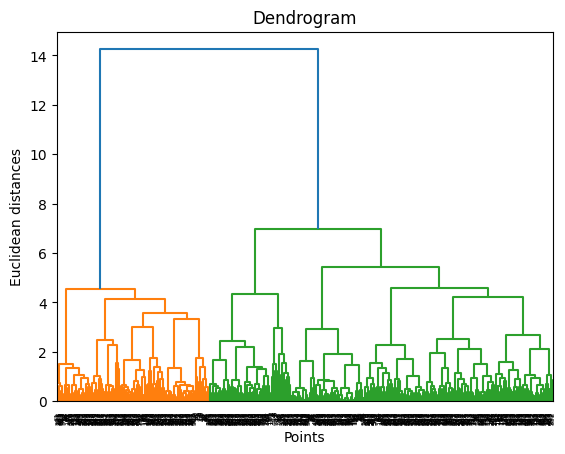

In [223]:
from sklearn.metrics import adjusted_rand_score

# y_hc_ar_score = adjusted_rand_score(labels_true, y_hc) 
# y_hc is the cluster labels to evaluate 

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

# Plot dendrogram
plot_dendrogram(modelData)

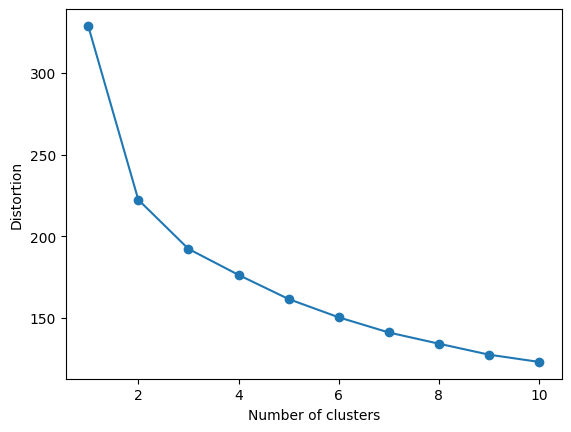

In [224]:
# import Kmeans from sklearn
from sklearn.cluster import KMeans
def plot_distortion(X,max_clusters = 10):
    """
    Create a plot to help identify the elbow of the inertia graph.
    Parameter:
    - X: Array of the data. Use `.to_numpy()` method to convert dataframe to array if needed.
    """
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_) # Calcuate the distortion for a given number of clusters

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

# elbow rule
plot_distortion(modelData,max_clusters=10)

In [226]:
# 2022-10-13 1:25 Looks like 3 clusters is best
modelData.columns.to_list()

['total_balance',
 'debt',
 'years_with_bank',
 'trans_amt_all_accounts',
 'age',
 'nbr_children',
 'PC_Credit_Used',
 'income',
 'total_savings_all_accounts',
 'savings_balance',
 'total_spending_all_accounts']

In [722]:
modelData.head(3)

,total_balance,debt,years_with_bank,trans_amt_all_accounts,age,nbr_children,PC_Credit_Used,income,total_savings_all_accounts,savings_balance,total_spending_all_accounts,cluster_km,cluster_ac
0,0.571419,0.145582,0.444444,0.429105,0.802632,0.0,1.0,0.033325,0.088338,1.000000,0.091574,1,1
1,0.555804,0.000000,0.666667,0.656045,0.565789,0.2,0.0,0.212713,0.108712,0.972673,0.054852,2,2
2,0.596125,0.000000,0.444444,0.491039,0.078947,0.0,0.0,0.129005,0.126330,0.956825,0.130005,2,2


In [393]:
# KMeans Clustering

km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=20, # how many initial runs
            random_state=0) # set the random_state parameter to easily reproduce the results.

# Train the model
km.fit(modelData)

# predict (the cluster to which a given point will belong)
y_km = km.predict(modelData)

In [229]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# create an object
# set the Euclidean distance to the affinity parameter
ac = AgglomerativeClustering(affinity='euclidean', 
            linkage='ward', #set the `linkage` parameter to the "ward"
            n_clusters = 3) # set the number of clusters to three.

# fit and predict 
y_hc = ac.fit_predict(modelData)

In [230]:
print(len(y_km), len(y_hc), len(modelData))

645 645 645


In [736]:
modelData['cluster_km'] = y_km
modelData['cluster_ac'] = y_hc
modelData.head()

C:\Users\silvh\AppData\Local\Temp\ipykernel_21268\2657405502.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\silvh\AppData\Local\Temp\ipykernel_21268\2657405502.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,total_balance,debt,years_with_bank,trans_amt_all_accounts,age,nbr_children,PC_Credit_Used,income,total_savings_all_accounts,savings_balance,total_spending_all_accounts,cluster_km,cluster_ac
cust_id,,,,,,,,,,,,,
1362924,0.571419,0.145582,0.444444,0.429105,0.802632,0.0,1.0000,0.033325,0.088338,1.000000,0.091574,1,1
1362567,0.555804,0.000000,0.666667,0.656045,0.565789,0.2,0.0000,0.212713,0.108712,0.972673,0.054852,2,2
1363251,0.596125,0.000000,0.444444,0.491039,0.078947,0.0,0.0000,0.129005,0.126330,0.956825,0.130005,2,2
1362848,0.523510,0.000000,0.777778,0.559073,0.026316,0.0,0.0000,0.000000,0.011937,0.916157,0.016002,2,2
1363474,0.502878,0.102306,0.555556,0.413535,0.092105,0.0,0.7027,0.023162,0.139060,0.874209,0.147125,1,1


In [395]:
# Compare clustering algorithm results
# Step 1: Create table showing counts for each KMeans and Agglomerative Clustering cluster assignment.

clusterComparison = pd.DataFrame(modelData['cluster_km']).merge(pd.get_dummies(modelData['cluster_ac']),
    how='outer',right_index=True,left_index=True
    ).groupby('cluster_km').sum()
    #.set_index('cluster_km')
clusterComparison_percent = clusterComparison/clusterComparison.sum()
clusterComparison_percent

,0,1,2
cluster_km,,,
0,0.935484,0.005051,0.0
1,0.064516,0.984848,0.0
2,0.000000,0.010101,1.0


In [396]:
clusterComparison.sum()

0    341
1    198
2    106
dtype: int64

Text(0.5, 1.0, 'KMeans Clustering vs. Agglomerative Clustering Assignment')

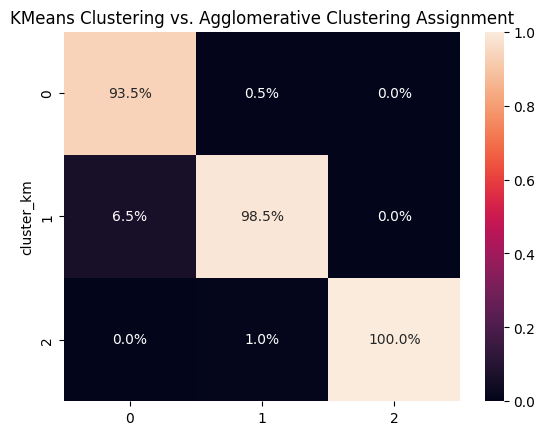

In [398]:
# Compare clustering algorithm results
# # Step 2: 
sns.heatmap(clusterComparison_percent,annot=True,fmt='.1%')
plt.title('KMeans Clustering vs. Agglomerative Clustering Assignment')

In [399]:
modelData.head(1)

,total_balance,debt,years_with_bank,trans_amt_all_accounts,age,nbr_children,PC_Credit_Used,income,total_savings_all_accounts,savings_balance,total_spending_all_accounts,cluster_km,cluster_ac
0,0.571419,0.145582,0.444444,0.429105,0.802632,0.0,1.0,0.033325,0.088338,1.0,0.091574,1,1


In [461]:
# Scatterplots showing clusters
df = modelData
@interact_manual #decorator
def exploreScatterplot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[0:]):

    # trace
    trace = [go.Scatter(x=df[x], y=df[y], mode='markers',marker_color=df['cluster_km'])]

    # layout
    layout = go.Layout(
                title = 'Scatter plot', # Graph title
                xaxis = dict(title = x.title()), # x-axis label
                yaxis = dict(title = y.title()), # y-axis label
                hovermode ='closest' # handles multiple points landing on the same vertical
    )

    # fig
    fig = go.Figure(trace, layout)
    fig.show()

interactive(children=(Dropdown(description='x', options=('total_balance', 'debt', 'years_with_bank', 'trans_am…

In [402]:
# retrieve mean for all of cluster 0
categories = sorted(modelData.columns[:-2])
modelData.groupby('cluster_km').mean().loc[0,categories]
modelData.groupby('cluster_km').mean().loc[0,categories[-1]]

0.31840277777777776

In [403]:
# check that dataframe data will be retrieved correctly in radar graph
modelData.groupby('cluster_km').mean()[categories]

,PC_Credit_Used,age,debt,income,nbr_children,savings_balance,total_balance,total_savings_all_accounts,total_spending_all_accounts,trans_amt_all_accounts,years_with_bank
cluster_km,,,,,,,,,,,
0,0.102398,0.310567,0.038152,0.124817,0.135000,0.102427,0.103804,0.112760,0.105974,0.560769,0.318403
1,0.926459,0.420446,0.252792,0.154472,0.149309,0.111321,0.113357,0.186365,0.145288,0.489984,0.406042
2,0.117256,0.548855,0.055781,0.225673,0.124074,0.131502,0.146998,0.190761,0.185513,0.568153,0.797325


In [570]:
# Multiple Radar plot in same figure. Not good due to change in color
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'},    {'type': 'polar'}]])

fig.add_trace(go.Scatterpolar(
      r=modelData.groupby('cluster_km').mean().loc[0,categories],
      theta=categories,
      fill='toself',
      name='KM cluster 0'
),1,1)
fig.add_trace(go.Scatterpolar(
      r=modelData.groupby('cluster_km').mean().loc[1,categories],
      theta=categories,
      fill='toself',
      name='KM cluster 0'
),1,1)

fig.add_trace(go.Scatterpolar(
      r=modelData.groupby('cluster_km').mean().loc[2,categories],
      theta=categories,
      fill='toself',
      name='KM cluster 2'
),1,1)
fig.update_layout(title='Mean values of KMeans Clusters',
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False
)
fig.add_trace(go.Scatterpolar(
      r=modelData.groupby('cluster_km').median().loc[0,categories],
      theta=categories,
      fill='toself',
      name='KM cluster 0'
),1,2)
fig.add_trace(go.Scatterpolar(
      r=modelData.groupby('cluster_km').median().loc[1,categories],
      theta=categories,
      fill='toself',
      name='KM cluster 1'
),1,2)

fig.add_trace(go.Scatterpolar(
      r=modelData.groupby('cluster_km').median().loc[2,categories],
      theta=categories,
      fill='toself',
      name='KM cluster 2'
),1,2)
fig.update_layout(title='Median values of KMeans Clusters',
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)
fig.show()

In [780]:
# Radar plot with means of KMeans clusters
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=modelData.groupby('cluster_km').mean().loc[0,categories],
      theta=categories,
      fill='toself',
      name='KM cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=modelData.groupby('cluster_km').mean().loc[1,categories],
      theta=categories,
      fill='toself',
      name='KM cluster 1'
))

fig.add_trace(go.Scatterpolar(
      r=modelData.groupby('cluster_km').mean().loc[2,categories],
      theta=categories,
      fill='toself',
      name='KM cluster 2'
))
fig.update_layout(title='Mean values of KMeans Clusters',
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()

In [405]:
# Using AC clusters, make radar plot with sorted columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=modelData.groupby('cluster_ac').mean().loc[0,categories],
      theta=categories,
      fill='toself',
      name='AC cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=modelData.groupby('cluster_ac').mean().loc[1,categories],
      theta=categories,
      fill='toself',
      name='AC cluster 1'
))

fig.add_trace(go.Scatterpolar(
      r=modelData.groupby('cluster_ac').mean().loc[2,categories],
      theta=categories,
      fill='toself',
      name='AC cluster 2'
))
fig.update_layout(title='Mean values of AC Clusters',
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()

In [406]:
# Make radar plot, thus time using the median instead of mean

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=modelData.groupby('cluster_km').median().loc[0,categories],
      theta=categories,
      fill='toself',
      name='KM cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=modelData.groupby('cluster_km').median().loc[1,categories],
      theta=categories,
      fill='toself',
      name='KM cluster 1'
))

fig.add_trace(go.Scatterpolar(
      r=modelData.groupby('cluster_km').median().loc[2,categories],
      theta=categories,
      fill='toself',
      name='KM cluster 2'
))
fig.update_layout(title='Median values of KMeans Clusters',
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()

In [407]:
# Using AC clusters and medians, make radar plot with sorted columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=modelData.groupby('cluster_ac').mean().loc[0,categories],
      theta=categories,
      fill='toself',
      name='KM cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=modelData.groupby('cluster_ac').mean().loc[1,categories],
      theta=categories,
      fill='toself',
      name='KM cluster 1'
))

fig.add_trace(go.Scatterpolar(
      r=modelData.groupby('cluster_ac').mean().loc[2,categories],
      theta=categories,
      fill='toself',
      name='KM cluster 2'
))
fig.update_layout(title='Median values of AC Clusters',
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()

In [539]:
# # 2022-10-13 19:17 Failed attempt at radar Scatter plot
df=modelData.transpose()[[0,1,2,3]].reset_index()
fig = go.Figure()
for customer in range(1,df.shape[1]-1):
    print(df.columns.to_list()[customer])
    fig.add_trace(
        go.Scatterpolar(r=df[customer], theta=df['index'],))
        # color='cluster_km')#, symbol="strength", size="frequency",
        # color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()

0
1
2


In [545]:
# 2022-10-13 19:17 Failed attempt at radar Scatter plot
df=modelData.transpose()[[0,1,2,3]].reset_index()
data=[]
for customer in range(1,df.shape[1]):
    print(df.columns.to_list()[customer])
    customerPlot = px.scatter_polar(df,r=df.columns.to_list()[customer], theta='index',)
        # color='cluster_km')#, symbol="strength", size="frequency",
        # color_discrete_sequence=px.colors.sequential.Plasma_r)
    data.append(customerPlot)
# fig = go.Figure(data=data)
print(type(data))
# fig.show()
df

0
1
2
3


TypeError: 'str' object is not callable

In [ ]:
# how to transpose a dataframe
test = modelData.loc[:2,:'cluster_km'].transpose().reset_index()
test.columns[0]
modelData.transpose()[df.columns.to_list()[0:3]]

In [460]:
# # Plot distribution of variables from model data

df=modelData # Put name of dataframe variable here
@interact_manual #decorator
def exploreHistogram(x=list(df.select_dtypes('number').columns)):
    fig = px.histogram(x=df[x],title=x)
    fig.show()

interactive(children=(Dropdown(description='x', options=('total_balance', 'debt', 'years_with_bank', 'trans_am…

Text(0, 0.5, 'PC2')

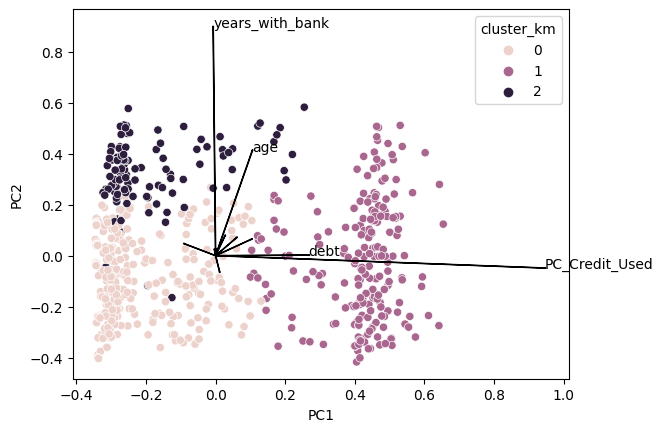

In [409]:
# Perform PCA
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

pca.fit(modelData[categories]) # Name of dataframe here; remove cluster columns
data_pca = pca.transform(modelData[categories])
data_pca = pd.DataFrame(data_pca)

# Get the projections ('loadings') of each dimension along each principal component:
loadings = pd.DataFrame(pca.components_)

# rename the columns from the PCA dataframe result
loadings.columns = modelData[categories].columns

# To plot the raw data along with the loading plot, scale the raw data down:
xscale = 1/(data_pca[0].max()-data_pca[0].min())
yscale = 1/(data_pca[1].max()-data_pca[1].min())
# Make the plots
sns.scatterplot(x=data_pca[0]*xscale,y=data_pca[1]*yscale,hue=modelData['cluster_km'])
for feature, vector in loadings.items():
    # Plot each feature using the two principal components as axes
    plt.arrow(0,0,vector[0],vector[1]) 
    # Label each arrow at the tip of the line
    if (vector[0] > loadings.loc[0,:].mean()) | (vector[1] > loadings.loc[1,:].mean()):
        plt.text(vector[0],vector[1],feature)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [576]:
dataSecondAnalaysis = customer_data[columnsToKeep] 

KeyError: "None of [Index(['total_balance', 'debt', 'years_with_bank', 'trans_amt_all_accounts',\n       'age', 'nbr_children', 'PC_Credit_Used', 'income',\n       'total_savings_all_accounts', 'savings_balance',\n       'total_spending_all_accounts'],\n      dtype='object')] are in the [columns]"

In [592]:
dfchecking_tran['accounttype'] = 'checking'

In [593]:
dfsavings_tran['accounttype'] = 'savings'
dfsavings_tran.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code,accounttype
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP,savings
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN,savings
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN,savings
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN,savings
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP,savings


In [594]:
dfcredit_tran['accounttype'] = 'credit'
dfcredit_tran.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code,accounttype
0,1362480,1,163.00,140.36,22.64,-1467.04,3.1.1995,170031,C,PM,credit
1,1362484,1,1293.59,1278.78,14.81,0.00,5.1.1995,195414,C,PM,credit
2,1362485,1,191.24,187.26,3.98,-95.12,3.1.1995,,M,PM,credit
3,1362487,1,-254.98,-254.98,0.00,-254.98,15.8.1995,84200,E,CG,credit
4,1362489,1,-1200.70,-1200.70,0.00,-2666.11,2.1.1995,191227,E,CG,credit


In [622]:
transactions = pd.concat([dfchecking_tran,dfsavings_tran,dfcredit_tran])
transactions.head(3)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code,accounttype
0,1362480,1,-297.38,-297.38,0.0,34.47,2.1.1995,,P,WD,checking
1,1362484,1,-172.76,-172.76,0.0,2440.70,2.1.1995,,P,WD,checking
2,1362485,1,-26.79,-26.79,0.0,182.99,26.9.1995,,P,WD,checking


In [653]:
customer_data.head()

,savings_balance,total_balance,debt,PC_Credit_Used,income,age,years_with_bank,nbr_children,savingacc_spending_mean_tran_amt,savingacc_spending_total_tran_amt,...,creditacc_spending_transactions_count,creditacc_saving_mean_tran_amt,creditacc_saving_total_tran_amt,creditacc_saving_transactions_count,creditacc_tran_amt_mean,creditacc_tran_amt_total,creditacc_transactions_count,total_spending_all_accounts,total_savings_all_accounts,trans_amt_all_accounts
cust_id,,,,,,,,,,,,,,,,,,,,,
1362924,5287.76,5287.76,1000.00,100.00,4804,74,4,0,NaN,0.00,...,3.0,125.305556,2255.50,18.0,-47.511429,-997.74,21.0,5697.50,4259.08,-3433.90
1362567,5143.26,5143.26,0.00,0.00,30664,56,6,1,155.124091,3412.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3412.73,5241.40,1828.67
1363251,5059.46,5516.38,0.00,0.00,18597,19,4,0,162.613077,2113.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8088.54,6090.84,-1997.70
1362848,4844.42,4844.42,0.00,0.00,0,15,7,0,248.895000,995.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,995.58,575.55,-420.03
1363474,4622.61,4653.50,702.74,70.27,3339,20,5,0,201.746000,1008.73,...,5.0,93.869687,3003.83,32.0,-18.187297,-672.93,37.0,9153.69,6704.59,-3794.96


In [624]:
transactions_dated = date_columns(transactions)
transactions_dated.head(3)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code,accounttype,tran_date_standard,tran_date_year,tran_date_month
0,1362480,1,-297.38,-297.38,0.0,34.47,2.1.1995,,P,WD,checking,1995-01-02,1995,1
1,1362484,1,-172.76,-172.76,0.0,2440.70,2.1.1995,,P,WD,checking,1995-01-02,1995,1
2,1362485,1,-26.79,-26.79,0.0,182.99,26.9.1995,,P,WD,checking,1995-09-26,1995,9


In [762]:
credit_transactions_dated = transactions_dated[transactions_dated['accounttype']=='credit']
credit_transactions_dated.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code,accounttype,tran_date_standard,tran_date_year,tran_date_month
0,1362480,1,163.00,140.36,22.64,-1467.04,3.1.1995,170031,C,PM,credit,1995-01-03,1995,1
1,1362484,1,1293.59,1278.78,14.81,0.00,5.1.1995,195414,C,PM,credit,1995-01-05,1995,1
2,1362485,1,191.24,187.26,3.98,-95.12,3.1.1995,,M,PM,credit,1995-01-03,1995,1
3,1362487,1,-254.98,-254.98,0.00,-254.98,15.8.1995,84200,E,CG,credit,1995-08-15,1995,8
4,1362489,1,-1200.70,-1200.70,0.00,-2666.11,2.1.1995,191227,E,CG,credit,1995-01-02,1995,1


In [764]:
# Create table showing sum of credit transactions per month for each customer.
monthlyTransactions = credit_transactions_dated.groupby(['cust_id','tran_date_month']).agg(transaction_sum=('tran_amt','sum')).unstack().droplevel(0,axis=1)
monthlyTransactions 

tran_date_month,1,2,3,4,5,6,7,8,9,10,11,12
cust_id,,,,,,,,,,,,
1362480,-869.96,20.66,31.95,32.09,32.09,32.09,32.09,32.09,32.09,253.21,-189.03,2509.29
1362484,1231.04,-262.48,60.92,-273.51,-38.88,367.34,-420.24,512.96,-117.04,-29.45,-708.86,602.07
1362485,-389.14,141.70,-502.16,-50.95,21.51,17.76,-21.89,906.29,-696.77,-194.27,2.50,4.19
1362487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-600.71,-60.79,-186.00,-41.55,-646.54
1362489,-1313.95,10.75,20.56,34.85,34.46,35.35,35.45,32.89,2803.82,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1363483,-40.41,422.92,-409.81,7.01,5.52,6.82,12.33,240.50,-229.49,6.98,2.70,0.71
1363484,783.89,-69.17,116.76,-133.85,-553.66,415.15,320.10,-432.76,101.41,182.16,-184.15,-74.74
1363485,4202.51,NaN,0.00,NaN,NaN,NaN,NaN,0.00,0.00,NaN,-240.00,-760.00


In [775]:
# Combine cluster numbers with sum of monthly credit transactions for plotting spending time series

customerTransactionsWithCluster = monthlyTransactions.merge(
    modelData[['cluster_km']],
    how='outer',left_index=True,right_index=True
)
# Calculate mean tran_amt per cluster
customerTransactionsClustered = customerTransactionsWithCluster.groupby('cluster_km').mean()
customerTransactionsClustered 

,1,2,3,4,5,6,7,8,9,10,11,12
cluster_km,,,,,,,,,,,,
0.0,632.121789,125.827561,17.966984,11.438370,-22.607500,70.401825,-37.167206,7.647206,41.253897,-75.598370,61.740000,153.995259
1.0,-150.314231,-46.164370,-21.305524,-66.856908,-79.292013,-79.028333,-77.187738,-26.605852,-46.061135,-198.561980,-112.482857,-282.028837
2.0,518.945970,479.169846,80.199848,0.604375,116.653115,-13.067377,75.762000,-31.399492,9.828070,4.034182,158.747679,461.399818


In [777]:
# Create table showing mean credit account balance per month for each customer.
monthlyBalance = credit_transactions_dated.groupby(['cust_id','tran_date_month']).agg(mean_account_balance=('new_balance','mean')).unstack().droplevel(0,axis=1)

# Combine cluster numbers with monthly balance for plotting spending time series
monthlyBalanceClustered =monthlyBalance.merge(
    modelData[['cluster_km']],
    how='outer',left_index=True,right_index=True
).groupby('cluster_km').mean() # calculate mean monthly balance per cluster
monthlyBalanceClustered.head()

,1,2,3,4,5,6,7,8,9,10,11,12
cluster_km,,,,,,,,,,,,
0.0,-854.882211,-740.093208,-678.645040,-640.666216,-623.051284,-595.289673,-596.373421,-595.150795,-531.747404,-607.494767,-557.011348,-471.146717
1.0,-1020.495707,-1060.810795,-1026.592476,-1022.440047,-1089.066602,-1119.275472,-1143.756588,-1133.303448,-1127.024844,-1187.907622,-1255.434141,-1406.947389
2.0,-1507.934002,-1098.075676,-1021.862609,-995.079708,-979.722880,-993.860823,-970.253154,-960.822095,-1005.808595,-1040.899542,-921.623474,-533.390141


Text(0.5, 1.0, 'Mean credit account balance. Negative balance = owing.')

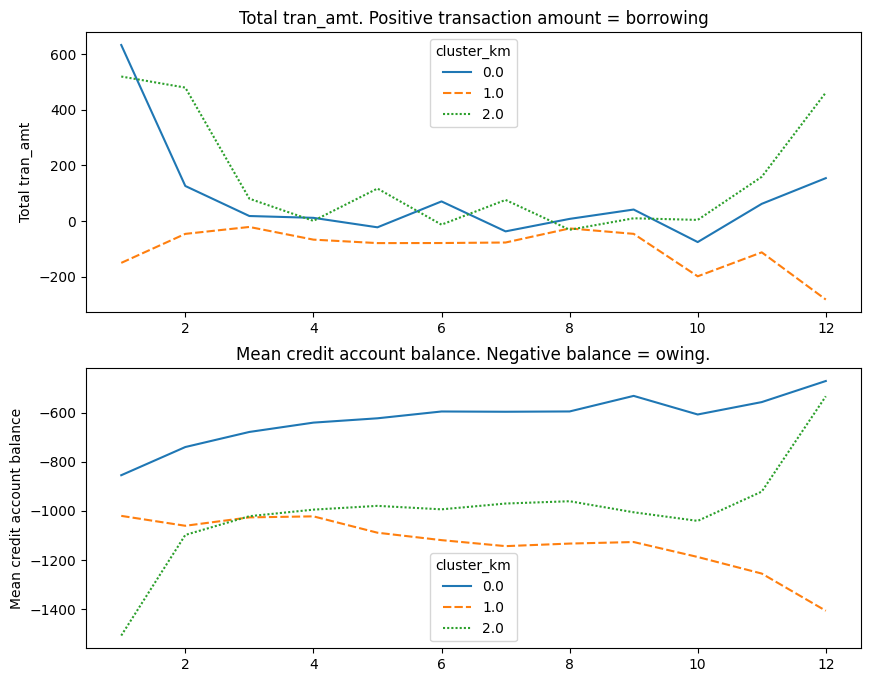

In [798]:
# Plot time series of credit account balance and transactions
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(10, 8))
sns.lineplot(data=customerTransactionsClustered.transpose(),ax=ax[0])
ax[0].set_ylabel('Total tran_amt')
ax[0].set_title('Total tran_amt. Positive transaction amount = borrowing')

sns.lineplot(data=monthlyBalanceClustered.transpose(),ax=ax[1])
ax[1].set_ylabel('Mean credit account balance')
ax[1].set_title('Mean credit account balance. Negative balance = owing.')


In [791]:
# confirm what positive or negative balance means
customer = credit_transactions_dated['cust_id']== 1362546 # 1362888
credit_transactions_dated[customer].sort_values('tran_date_standard')
# Positive transaction amount = borrowing/spending; negative transaction amount = paying off credit

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code,accounttype,tran_date_standard,tran_date_year,tran_date_month
24,1362546,1,1534.27,1507.16,27.11,-833.45,3.1.1995,,M,PM,credit,1995-01-03,1995,1
481,1362546,2,0.00,0.00,0.00,-833.45,3.1.1995,111924,C,IQ,credit,1995-01-03,1995,1
933,1362546,3,-94.42,-94.42,0.00,-927.87,7.1.1995,105658,E,CG,credit,1995-01-07,1995,1
1385,1362546,4,-123.49,-123.49,0.00,-1051.36,8.1.1995,83415,E,CG,credit,1995-01-08,1995,1
1836,1362546,5,-87.50,-87.50,0.00,-1138.86,14.1.1995,151901,E,CG,credit,1995-01-14,1995,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19591,1362546,80,-39.36,-39.36,0.00,-1027.92,19.12.1995,81255,E,CG,credit,1995-12-19,1995,12
19622,1362546,81,-66.38,-66.38,0.00,-1094.30,19.12.1995,82844,E,CG,credit,1995-12-19,1995,12
19652,1362546,82,-27.07,-27.07,0.00,-1121.37,23.12.1995,161532,E,CG,credit,1995-12-23,1995,12
19681,1362546,83,-58.20,-58.20,0.00,-1179.57,26.12.1995,162801,E,CG,credit,1995-12-26,1995,12


In [703]:
# Combine customer dataframe with monthly transactions

customerDataTransactions = customer_data.merge(
    monthlyTransactions,
    how='inner',left_index=True,right_on='cust_id'
)

# Create dataframe for plotting spending time series
transactionsTimeSeries = customerDataTransactions.loc[:,customerDataTransactions.columns.to_list()[-12:]].transpose()
customerDataTransactions


,savings_balance,total_balance,debt,PC_Credit_Used,income,age,years_with_bank,nbr_children,savingacc_spending_mean_tran_amt,savingacc_spending_total_tran_amt,...,3,4,5,6,7,8,9,10,11,12
cust_id,,,,,,,,,,,,,,,,,,,,,
1362924,5287.76,5287.76,1000.00,100.00,4804,74,4,0,NaN,0.00,...,159.06,-62.90,-583.01,-94.68,-115.53,-390.12,-521.63,928.38,-1190.83,-774.83
1362567,5143.26,5143.26,0.00,0.00,30664,56,6,1,155.124091,3412.73,...,860.56,261.02,-716.30,746.46,-816.17,-299.76,409.63,-538.98,72.63,1836.39
1363251,5059.46,5516.38,0.00,0.00,18597,19,4,0,162.613077,2113.97,...,-951.94,934.40,-57.93,-57.02,-677.47,-218.02,-265.53,184.25,177.63,12.62
1362848,4844.42,4844.42,0.00,0.00,0,15,7,0,248.895000,995.58,...,13.23,-154.44,12.88,174.01,-582.41,185.54,12.35,12.38,12.41,-132.34
1363474,4622.61,4653.50,702.74,70.27,3339,20,5,0,201.746000,1008.73,...,-377.97,-189.14,-96.83,-107.10,-3105.27,-96.61,-243.05,114.69,149.04,-186.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362573,NaN,NaN,NaN,NaN,40798,36,6,2,288.197692,3746.57,...,-1975.99,-560.41,-198.58,851.11,-643.26,586.35,-398.40,620.99,18.40,-174.07
1362960,NaN,NaN,NaN,NaN,57642,59,9,1,347.922727,3827.15,...,108.27,-107.79,660.15,375.27,660.77,-783.63,28.23,-73.40,-711.17,316.37
1363366,NaN,NaN,NaN,NaN,62234,30,0,3,359.295385,4670.84,...,0.58,0.58,0.58,0.59,0.59,0.59,0.59,0.59,0.59,7000.08


<AxesSubplot: >

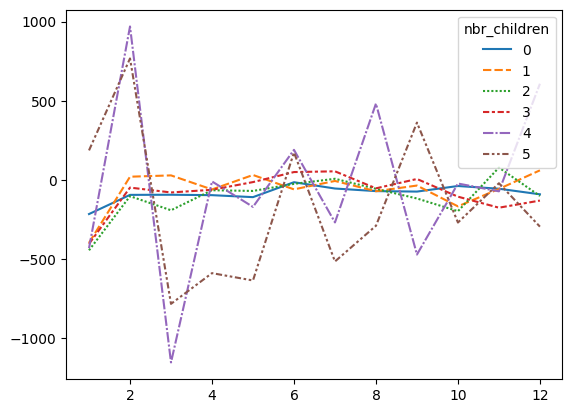

In [744]:
# Parse data on mean monthly spending per number of children and plot it.
transactionsTimeSeries = customerDataTransactions.groupby('nbr_children').agg('mean').transpose()[-12:]
transactionsTimeSeries
sns.lineplot(data=transactionsTimeSeries)

In [ ]:
# customer_data.to_csv('accounts_customers_transactions_2022-10-12v2.csv')
# customer_data.to_csv('customer_transactions_2022-10-12.csv')
# customerTransactions.to_csv('customer_transactions_2022-10-11.csv')
# scaledCustomerTransactions.to_csv('customer_transactions_scaled_2022-10-11.csv')